## Capstone Writeup and Technical Analysis ##


## Understanding the Data Science job market in the Atlanta regional area##

**Executive Summary and Problem Statement**

***Executive Summary***

There exists websites that provide you a match percentage of ones resume against a job description. 
There exists websites that provide a geographic representation of jobs in a given area. 
There exists services that provide real time traffic visual representation in a given area. 
However - there is not a service that provides all these three data points simultaneously. 
I believe a service that provides this could help job seekers be more informed in the decisions they are making about their careers. 

Example: A job seeker that moves into a new city can better compare different opportunities based on commute distance and typical traffic patterns. 

***Problem Statement***

Can a platform be created where job seekers are provided a better visual and analytical overview of jobs they 
are considering? 





***Anticipated Results:***

A model that can predict the cosine_similarity between two or more documents. 
I then use these results to provide a visual overview of the best matching jobs to ones profile. 
Additionally 



***Scope Statement***

Provide a visual overview of the data science jobs available in the Atlanta area and the 
percentage match a given document is to the provided job description. Additionally provide traffic information
to better understand commute requirements to a given opportunity. 

***Summary***

To accomplish the scope above the following procedures were utilized. 

1. Examine different models to determine which model would provide the best results for document comparisons. 
2. Examine different platforms to determine which would provide the best map layout overview. 
3. Examine which platforms can accomodate a traffic overview
4. As an addendum to this Capstone - I will also be using Tableau to better understand those who are switching careers to go into the field of Data Science. 

***Project Phases***

1.  Scrape from Indeed.com website to build out initial dataframe. 
2.  Collect individual slugs from company links so that a full job description can be retrieved. 
3.  Use Countvectorizer on the technical requirements of the job descriptions. 
4.  Use Countvectorizer on the non-technical / cultural requirements of the job descriptions. 
5.  Configure StopWords on the aggregated technical requirements of the job descriptions. 
6.  Pre-process / clean resume version 1. 
7.  Pre-process / clean resume version 2. 
8.  Countvectorize both resume versions. 
9.  Retrieve individual job descriptions. 
10. Pre-process / clean individaul job descriptions. 
11. Use cosine similarity to compare resume versions to the aggregated regional job descriptions. 
12. Use cosine similarity to compare resume versions to each individual job description. 
13. Create dataframe or data table for each of the job opportunities, their addresses, their coordinates and the respective document match percentage. 
14. Plot each point onto the Google Maps API Python plugin. 
15. Overlay traffic patterns on Google Maps API. 

***Project Addendum: Using Kaggle Datasets to understand***

1. Download datasets from Kaggle
2. Upload datasets into Jupyter Notebooks and perform initial exploratory data analysis. 
3. Create dataframe with cleaned data.


***Anticipated Risks***
1. Have not used Gmaps previously. I do not know at this time how complicated this could be. 
2. Contingency Plan: Use Tableau Map function

3. Converting scraped job descriptions into individual CSV files. 
4. Contingency Plan: May need to just do each on a manual basis. I could probably manage at least 50 individual jobs. This should be enough to conduct an analysis for the Atlanta area. 



## Project Schedule ##
I realized that I would need to balance the capstone with the rest of the work that needed to be done to fulfill graduation requirements. A project schedule needed to be created to make sure all the phases were completed on time. 

In [8]:
import pandas as pd
pd.read_excel('Project Schedule.xlsx')

,Project Phase,Start Date,End Date,Summary Notes
0,Step01-Scraping from Indeed Pages to build ini...,2018-06-30,2018-06-30,Completed
1,Step02-Get Full JD,2018-07-01,2018-07-01,Completed
2,Step03-Countvectorizer_Regional-Technical_Requ...,2018-07-02,2018-07-02,Completed
3,Step04-StopWords_Regional_Cultural_Requirements,2018-07-03,2018-07-04,Completed
4,Step05-Stop Words-Regional_TechnicalRequirements,2018-07-04,2018-07-04,Completed
5,Step06-Cleaning-BaselineResume,2018-07-05,2018-07-05,Completed
6,Step07-Countvectorize_Resume,2018-07-06,2018-07-06,Completed
7,Step08-Cleaning-Updated_Resume,2018-07-07,2018-07-07,Completed
8,Step09-Countvectorize_Updated_Resume,2018-07-08,2018-07-08,Completed
9,Step10-Capstone-Getting Individual JDs,2018-07-09,2018-07-09,Completed


## Code Snippets ##

Please note - I am presenting here code snippets from my overall project. 

This is not the entirety of the code but examples of the work involved in the overall project. 

## Code Snippet: Initial Scraping Work##

```Python
max_results_per_city = 1000
results = []

for city in indeed_cities:
    for start in range(0, max_results_per_city, 100):
        url = "https://www.indeed.com/jobs?as_and=data+scientist+python&as_phr=&as_any=&as_not=&as_ttl=&as_cmp=&jt=all&st=\
               &salary=&radius=25&l= + Atlanta + &fromage=any&limit=100&start=" + str(start) + "&sort=&psf=advsrch"
        html = requests.get(url)
        soup = BeautifulSoup(html.text, 'html.parser')
        for result in soup.find_all('div', {'class':' row result'}):
            results.append(result)
        sleep(1)
```

## Code Snippet: Getting Full Job Descriptions ##
```Python

for r in slugs[:30]:
    new_url = 'http://www.indeed.com' + r
    print('Requesting content from ' + new_url) # you can add + '...' 
    res = requests.get(new_url)
    # print('Converting content from the res object.')
    soup = BeautifulSoup(res.content, 'lxml')
    extended_descriptions.append(soup)
    sleep(3)
    print('Appending soup...')
```

## Code Snippet: Customizing Stopwords ##
```Python

custom_stopwords = ['000', '01', '06', '08','10254', '12', '15',
                   '19', '2018', '22', '25', '28', '45', '500',
                   'cox', 'norfolk', 'apply', 'com', 'www', 'applications', 'application',
                   'applicants', 'southern', 'https', 'ia', 'var', 'indeedapply', 'env',
                   'atlanta', 'opportunity', 'iip', 'gender', 'location', 'new', 'employer',
                   'midtown', 'manheim', 'ml', 'including', 'llc', 'truck', 'automotive', 'nationality', 
                   'nation', 'iot', 'kelley', 'hopea', 'date', 'incadea', 'honeywell', 'j00067915', '00', '10', 
                   '100', '16', '16614', '18', '18230', '1901', '20', '2006', '2013', '24', '27', '401', '40b',
                   '420', '450', '50', '60', 'kentucky'
                   
                   ]
new_stop = list(stop_words.ENGLISH_STOP_WORDS)
new_stop.extend(custom_stopwords)
cvec = CountVectorizer(stop_words = new_stop, min_df=10)
```

## Code Snippet: Countvectorization ##

```Python
new_stop = list(stop_words.ENGLISH_STOP_WORDS)
new_stop.extend(custom_stopwords)
cvec = CountVectorizer(stop_words = new_stop)
df  = pd.DataFrame(new_corpus.todense(),
                   columns=cvec.get_feature_names())
df.head()
df.sort_values('data', ascending=False).head(10)

```

## Code Snippet: Cosine_Similarity ##
```Python
def get_similarity(dict1, dict2):
    all_words_list = []
    for key in dict1:
        all_words_list.append(key)
    for key in dict2:
        all_words_list.append(key)
    all_words_list_size = len(all_words_list)
    
    v1 = np.zeros(all_words_list_size, dtype = np.int)
    v2 = np.zeros(all_words_list_size, dtype = np.int)
    i = 0
    for (key) in all_words_list:
        v1[i] = dict1.get(key, 0)
        v2[i] = dict2.get(key, 0)
        i = i + 1
    return cos_sim(v1, v2);

if __name__ == '__main__':
    dict1 = process('Bullets')
    dict2 = process('Resumes/Updated_Resume_Vectorized.csv')
    dict3 = process('Resumes/Resume_Vectorized.csv')
    dict4 = process('Paragraphs')
    dict5 = process('Job_Descriptions_csv/TruckIT-Desc.csv')
    dict6 = process('Job_Descriptions_csv/Cotiviti.csv')
    
```
Credit: https://blogs.oracle.com/meena/finding-similarity-between-text-documents

## Code Snippet: Using Gmaps ##

```Python

data_science = [
    {'name': 'TruckIT', 'location': (33.847387, -84.431586), 'Match Percentage': 0.807, 'Days Posted': 5},
    {'name': 'Cotiviti', 'location':(33.934144, -84.35962), 'Match Percentage': 0.665, 'Days Posted': 5},
    {'name': 'Home Depot', 'location':(33.86549, -84.481408), 'Match Percentage': 0.688, 'Days Posted': 5},
    {'name': 'AnswerRocket', 'location':(33.940736, -84.361513), 'Match Percentage': 0.823, 'Days Posted': 2},
    {'name': 'Cox Automotive', 'location':(33.913781, -84.342588), 'Match Percentage': 0.821, 'Days Posted': 5},
    {'name': 'TravelPort', 'location':(33.657159, -84.415204), 'Match Percentage': 0.841, 'Days Posted': 5},
    {'name': 'Coca Cola', 'location':(33.754155, -84.38139), 'Match Percentage': 0.928, 'Days Posted': 5},
    {'name': 'SalesLoft', 'location':(33.786986, -84.388118), 'Match Percentage': 0.896, 'Days Posted': 4},
    {'name': 'SoftVision', 'location':(33.791482, -84.386529), 'Match Percentage': 0.645, 'Days Posted': 5},
    {'name': 'Aarons', 'location':(34.033083, -84.564686), 'Match Percentage': 0.846, 'Days Posted': 5},
    {'name': 'HOME', 'location':(33.968690, -84.785872),'Match Percentage': 0, 'Days Posted': 0},
    {'name': 'Inspire Brands', 'location':(33.930034, -84.350866),'Match Percentage': 0.823, 'Days Posted': 5},
    {'name': 'Hiscox Insurance', 'location':(33.91708, -84.354513),'Match Percentage': 0.871, 'Days Posted': 6},
    
]

job_locations = [job['location'] for job in data_science]
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>Match %</dt><dd>{Match Percentage}</dd>
<dt>Days Posted</dt><dd>{Days Posted}</dd>
</dl>
"""
job_info = [info_box_template.format(**plant) for plant in data_science]

marker_layer = gmaps.marker_layer(job_locations, info_box_content=job_info)
fig = gmaps.figure(center=(33.753746, -84.386330), zoom_level=11)
fig.add_layer(marker_layer)
fig.add_layer(gmaps.traffic_layer())
fig

```

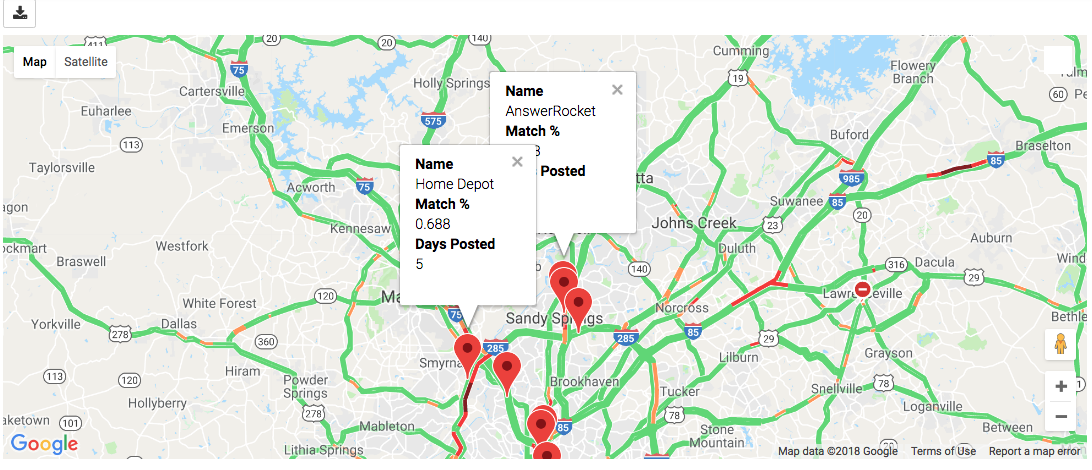

In [7]:
from IPython.display import Image
Image('Gmaps1.png')

## Code Snippet: Summary Table as a Datafame ##

In [8]:
import pandas as pd
pd.read_excel('Job Table.xlsx')

,Documents being analyzed for similarity,Resume 1 - Updated,Resume 2 - Previous,Address,Latitude,Longitude
0,Aggregated Regional Job Descriptions - Bullets,0.806,0.807,NaN,NaN,NaN
1,Similarity between 2 Resumes,0.998,0.998,NaN,NaN,NaN
2,Aggregated Regional Job Descriptions - Culture...,0.825,0.825,NaN,NaN,NaN
3,Truck IT,0.805,0.807,"1380 West Paces Ferry Rd NW, Atlanta, GA 30327",33.847387,-84.431586
4,Cotiviti,0.656,0.661,"One Glenlake Parkway #1400, Atlanta, GA 30328",33.934144,-84.359620
5,Home Depot,0.686,0.688,"2455 Paces Ferry Rd SE, Atlanta, GA 30339",33.865490,-84.481408
6,Honeywell,0.814,0.816,"715 Peachtree St NE, Atlanta, GA 30308",33.773495,-84.387307
7,AnswerRocket,0.821,0.823,"50 Glenlake Pkwy NE #200, Sandy Springs, GA 30328",33.940736,-84.361513
8,Cox Automotive,0.817,0.821,"3003 Summit Blvd NE #200, Atlanta, GA 30319",33.913781,-84.342588
9,Travelport,0.832,0.841,"760 Doug Davis Dr # B, Atlanta, GA 30354",33.657159,-84.415204


In [2]:
import pandas as pd
df = pd.read_excel('Job Table.xlsx')

In [5]:
df.iloc[3]

Documents being analyzed for similarity                                          Truck IT
Resume 1 - Updated                                                                  0.805
Resume 2 - Previous                                                                 0.807
Address                                    1380 West Paces Ferry Rd NW, Atlanta, GA 30327
Latitude                                                                          33.8474
Longitude                                                                        -84.4316
Name: 3, dtype: object

In [8]:
df = df.dropna()

In [13]:
df.head()

,Documents being analyzed for similarity,Resume 1 - Updated,Resume 2 - Previous,Address,Latitude,Longitude
3,Truck IT,0.805,0.807,"1380 West Paces Ferry Rd NW, Atlanta, GA 30327",33.847387,-84.431586
4,Cotiviti,0.656,0.661,"One Glenlake Parkway #1400, Atlanta, GA 30328",33.934144,-84.359620
5,Home Depot,0.686,0.688,"2455 Paces Ferry Rd SE, Atlanta, GA 30339",33.865490,-84.481408
6,Honeywell,0.814,0.816,"715 Peachtree St NE, Atlanta, GA 30308",33.773495,-84.387307
7,AnswerRocket,0.821,0.823,"50 Glenlake Pkwy NE #200, Sandy Springs, GA 30328",33.940736,-84.361513


In [27]:
# here I'm saving just one row so I can experiment before scaling
t = df.iloc[0]

In [28]:
# awesomely, we can cast a Series to a dictionary just like this
dict(t)

{'Address ': '1380 West Paces Ferry Rd NW, Atlanta, GA 30327',
 'Documents being analyzed for similarity': 'Truck IT',
 'Latitude': 33.847387,
 'Longitude': -84.431586,
 'Resume 1 - Updated': 0.805,
 'Resume 2 - Previous': 0.807}

In [29]:
# this is clumsy! can for sure be improved
# cast row as a dictionary,
# initialize new dictionary
# grab the indexed values and return just them!

def dict_from_row(row):
    row = dict(row)
    d = {}
    d['Latitude'] = row['Latitude']
    d['Longitude'] = row['Longitude']
    return d

In [35]:
for each in df.iterrows():
    print(type(each))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [37]:
for each in range(len(df)):
    print(dict_from_row(df.iloc[each]))

{'Latitude': 33.847387, 'Longitude': -84.431586}
{'Latitude': 33.934144, 'Longitude': -84.35962}
{'Latitude': 33.86549, 'Longitude': -84.481408}
{'Latitude': 33.773495, 'Longitude': -84.387307}
{'Latitude': 33.940736, 'Longitude': -84.361513}
{'Latitude': 33.913781, 'Longitude': -84.342588}
{'Latitude': 33.657159, 'Longitude': -84.415204}
{'Latitude': 33.754155, 'Longitude': -84.38139}
{'Latitude': 33.786986, 'Longitude': -84.388118}
{'Latitude': 33.791482, 'Longitude': -84.386529}
{'Latitude': 34.033083, 'Longitude': -84.564686}
{'Latitude': 33.930034, 'Longitude': -84.350866}
{'Latitude': 33.91708, 'Longitude': -84.354513}


In [38]:
# for each in df.iterrows():
#     dict_from_row(each)

In [26]:
dict_from_row(t)

{'Latitude': 33.847387, 'Longitude': -84.431586}

In [ ]:
{'name': 'TruckIT',
 'location': (33.847387, -84.431586),
 'Match Percentage': 0.807,
 'Days Posted': 5}

## Overall Summary ##

There was no significant difference between which version of resume I used. 